In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from sklearn.metrics import accuracy_score
from collections import defaultdict

In [28]:
df_train=pd.read_csv("train_mnist.csv")

In [29]:
def convert(imgf, labelf, outf, n):
    f = open(imgf, "rb")
    o = open(outf, "w")
    l = open(labelf, "rb")
    f.read(16)
    l.read(8)
    images = []
    for i in range(n):
        image = [ord(l.read(1))]
        for j in range(28*28):
            image.append(ord(f.read(1)))
        images.append(image)
    for image in images:
        o.write(",".join(str(pix) for pix in image)+"\n")
    f.close()
    o.close()
    l.close()
convert("t10k-images.idx3-ubyte", "t10k-labels.idx1-ubyte","mnist_test.csv", 10000)
df_test=pd.read_csv("mnist_test.csv")

In [30]:
y_train=df_train["label"].values
df_train=df_train.drop("label",axis=1)
y_test=df_test["7"].values
df_test=df_test.drop("7",axis=1)
#plt.imshow(df_train.lo[8], cmap='Greys')

In [31]:
x_train=df_train.loc[:,"pixel0":"pixel783"].values
x_test=df_test.loc[:,'0':'0.667'].values

In [32]:
print(x_train.shape)
print(x_test.shape)

(42000, 784)
(9999, 784)


In [33]:
x_train_final=np.zeros((28,28,42000))
x_test_final=np.zeros((28,28,9999))
for i in range(x_train.shape[0]):
    x_train_final[:,:,i]=np.reshape(x_train[i], (-1, 28))
for i in range(x_test.shape[0]):
    x_test_final[:,:,i]=np.reshape(x_test[i], (-1, 28))
    

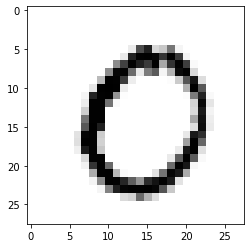

In [34]:
plt.imshow(x_test_final[:,:,100], cmap='Greys')

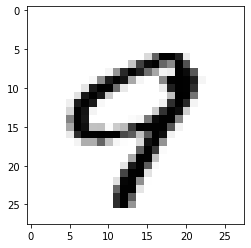

In [35]:
plt.imshow(x_train_final[:,:,100], cmap='Greys')

In [36]:
x_train_final_cnn = x_train.reshape(x_train_final.shape[2], 28, 28, 1)
x_test_final_cnn = x_test.reshape(x_test_final.shape[2], 28, 28, 1)

In [37]:
x_train_final_cnn = x_train_final_cnn.astype('float32')
x_test_final_cnn = x_test_final_cnn.astype('float32')
x_train_final_cnn /= 255
x_test_final_cnn /= 255

In [38]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Flatten()) 
model.add(Conv2D(28, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [39]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x=x_train_final_cnn,y=y_train, epochs=10)

Epoch 1/10
1313/1313 [==============================] - 17s 12ms/step - loss: 0.2566 - accuracy: 0.9220
Epoch 2/10
1313/1313 [==============================] - 18s 14ms/step - loss: 0.0873 - accuracy: 0.9730
Epoch 3/10
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0643 - accuracy: 0.9807
Epoch 4/10
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0526 - accuracy: 0.98330s - loss: 0.051
Epoch 5/10
1313/1313 [==============================] - 15s 12ms/step - loss: 0.0440 - accuracy: 0.9859
Epoch 6/10
1313/1313 [==============================] - 15s 12ms/step - loss: 0.0404 - accuracy: 0.9871
Epoch 7/10
1313/1313 [==============================] - 15s 12ms/step - loss: 0.0342 - accuracy: 0.9889
Epoch 8/10
1313/1313 [==============================] - 17s 13ms/step - loss: 0.0322 - accuracy: 0.9895
Epoch 9/10
1313/1313 [==============================] - 19s 14ms/step - loss: 0.0276 - accuracy: 0.9907
Epoch 10/10
1313/1313 [=========================

In [69]:
y_pred_cnn=model.predict(x_test_final_cnn[:1000])

In [70]:
y_preds_cnn=[]
for i in range(1000):
    y_preds_cnn.append(list(y_pred_cnn[i]).index(max(y_pred_cnn[i])))

In [73]:
accuracy_score(y_test[:1000], y_preds_cnn)

0.988

In [1]:
def Euclidean_distance(row1, row2):
 distance = 0
 for i in range(len(row1)-1):
     distance += (row1[i] - row2[i])**2
 return np.sqrt(distance)
def Get_Neighbors(train, test_row, num):
 distance = list() 
 data = []
 for i in train:
     dist = Euclidean_distance(test_row, i)
     distance.append(dist)
     data.append(i)
 distance = np.array(distance)
 data = np.array(data)
 index_dist = distance.argsort()
 data = data[index_dist]
 #slicing k value from number of data
 neighbors = data[:num]
 return neighbors
def predict_classification(train, test_row, num):
 Neighbors = Get_Neighbors(train, test_row, num)
 Classes = []
 for i in Neighbors:
     Classes.append(i[-1])
 prediction = max(Classes, key= lambda x:x.count)
 return prediction

In [62]:
from sklearn.metrics import accuracy_score
import time
start=time.time()
y_pred=[]
y_temp=[]
for i in range(1000):
    y_pred.append(predict_classification(test,test[i],10))
end=time.time()
print(end-start)

7593.75846862793


In [67]:
accuracy_score(y_pred,y_test[:1000])

0.948